<a href="https://www.kaggle.com/code/nizarbousabat/movie-recommendation-system-project?scriptVersionId=214823440" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a href="https://www.kaggle.com/code/nizarbousabat/movie-recommendation-system-project?scriptVersionId=214635121" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a href="https://www.kaggle.com/code/nizarbousabat/movie-recommendation-system-project?scriptVersionId=214326625" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [243]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zipcodes-county-fips-crosswalk/ZIP-COUNTY-FIPS_2017-06.csv
/kaggle/input/movielens-100k-dataset/ml-100k/u.occupation
/kaggle/input/movielens-100k-dataset/ml-100k/u1.base
/kaggle/input/movielens-100k-dataset/ml-100k/u.info
/kaggle/input/movielens-100k-dataset/ml-100k/u4.test
/kaggle/input/movielens-100k-dataset/ml-100k/u.item
/kaggle/input/movielens-100k-dataset/ml-100k/README
/kaggle/input/movielens-100k-dataset/ml-100k/u1.test
/kaggle/input/movielens-100k-dataset/ml-100k/ua.test
/kaggle/input/movielens-100k-dataset/ml-100k/u.data
/kaggle/input/movielens-100k-dataset/ml-100k/u5.test
/kaggle/input/movielens-100k-dataset/ml-100k/mku.sh
/kaggle/input/movielens-100k-dataset/ml-100k/u5.base
/kaggle/input/movielens-100k-dataset/ml-100k/u.user
/kaggle/input/movielens-100k-dataset/ml-100k/ub.base
/kaggle/input/movielens-100k-dataset/ml-100k/u4.base
/kaggle/input/movielens-100k-dataset/ml-100k/u2.test
/kaggle/input/movielens-100k-dataset/ml-100k/ua.base
/kaggle/input/movielens-100

## Reading the main datasets

In [244]:
df = pd.read_csv('/kaggle/input/movielens-100k-dataset/ml-100k/u.data', sep='\t', header=None, names=['user_id', 'movie_id', 'rating','timestamp'])

In [245]:
df.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   movie_id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [247]:
df.shape

(100000, 4)

In [248]:
df_info=pd.read_csv('/kaggle/input/movielens-100k-dataset/ml-100k/u.info', sep='\t', header=None)

In [249]:
df_info.head()

,0
0,943 users
1,1682 items
2,100000 ratings


In [250]:
column_names = [ 'movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western' ] 
# Read the file 
df_items = pd.read_csv( '/kaggle/input/movielens-100k-dataset/ml-100k/u.item', sep='|', header=None, names=column_names, encoding='ISO-8859-1' )

In [251]:
df_items.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [252]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   movie_title         1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   IMDb_URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [253]:
df_genre=pd.read_csv('/kaggle/input/movielens-100k-dataset/ml-100k/u.genre', sep='|', header=None)

In [254]:
df_genre.head()

,0,1
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4


In [255]:
df_user= pd.read_csv('/kaggle/input/movielens-100k-dataset/ml-100k/u.user', sep='|', header=None, names=['user_id','age','gender','occupation','zip code'])

In [256]:
df_user.head()

,user_id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


## Merging tables

#### Here we will merge all the table in one table so we can see the relationship between users and movies

In [257]:
df_merged1 = pd.merge(df, df_user, on='user_id', how='inner')

In [258]:
df_merged1.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip code
0,196,242,3,881250949,49,M,writer,55105
1,186,302,3,891717742,39,F,executive,00000
2,22,377,1,878887116,25,M,writer,40206
3,244,51,2,880606923,28,M,technician,80525
4,166,346,1,886397596,47,M,educator,55113


In [259]:
df_merged1.shape

(100000, 8)

In [260]:
df_merged = pd.merge(df_merged1, df_items, on='movie_id', how='inner')

## Explore the merged data

In [261]:
df_merged.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip code,movie_title,release_date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,891717742,39,F,executive,00000,L.A. Confidential (1997),01-Jan-1997,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,878887116,25,M,writer,40206,Heavyweights (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,880606923,28,M,technician,80525,Legends of the Fall (1994),01-Jan-1994,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,886397596,47,M,educator,55113,Jackie Brown (1997),01-Jan-1997,...,0,0,0,0,0,0,0,0,0,0


In [262]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             100000 non-null  int64  
 1   movie_id            100000 non-null  int64  
 2   rating              100000 non-null  int64  
 3   timestamp           100000 non-null  int64  
 4   age                 100000 non-null  int64  
 5   gender              100000 non-null  object 
 6   occupation          100000 non-null  object 
 7   zip code            100000 non-null  object 
 8   movie_title         100000 non-null  object 
 9   release_date        99991 non-null   object 
 10  video_release_date  0 non-null       float64
 11  IMDb_URL            99987 non-null   object 
 12  unknown             100000 non-null  int64  
 13  Action              100000 non-null  int64  
 14  Adventure           100000 non-null  int64  
 15  Animation           100000 non-null

#### we see that there are some nan values that we need to clear

## Clean the data

In [263]:
df_cleaned = df_merged.dropna(axis=1, how='all')

In [264]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       100000 non-null  int64 
 1   movie_id      100000 non-null  int64 
 2   rating        100000 non-null  int64 
 3   timestamp     100000 non-null  int64 
 4   age           100000 non-null  int64 
 5   gender        100000 non-null  object
 6   occupation    100000 non-null  object
 7   zip code      100000 non-null  object
 8   movie_title   100000 non-null  object
 9   release_date  99991 non-null   object
 10  IMDb_URL      99987 non-null   object
 11  unknown       100000 non-null  int64 
 12  Action        100000 non-null  int64 
 13  Adventure     100000 non-null  int64 
 14  Animation     100000 non-null  int64 
 15  Children's    100000 non-null  int64 
 16  Comedy        100000 non-null  int64 
 17  Crime         100000 non-null  int64 
 18  Documentary   100000 non-

In [265]:
df_cleaned = df_cleaned.dropna()

In [266]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99987 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       99987 non-null  int64 
 1   movie_id      99987 non-null  int64 
 2   rating        99987 non-null  int64 
 3   timestamp     99987 non-null  int64 
 4   age           99987 non-null  int64 
 5   gender        99987 non-null  object
 6   occupation    99987 non-null  object
 7   zip code      99987 non-null  object
 8   movie_title   99987 non-null  object
 9   release_date  99987 non-null  object
 10  IMDb_URL      99987 non-null  object
 11  unknown       99987 non-null  int64 
 12  Action        99987 non-null  int64 
 13  Adventure     99987 non-null  int64 
 14  Animation     99987 non-null  int64 
 15  Children's    99987 non-null  int64 
 16  Comedy        99987 non-null  int64 
 17  Crime         99987 non-null  int64 
 18  Documentary   99987 non-null  int64 
 19  Drama    

#### we didn't lost so much data so it's ok to delete the nan values

In [267]:
df_cleaned["unknown"].head()

0    0
1    0
2    0
3    0
4    0
Name: unknown, dtype: int64

### we see that unknown column has zeros so we should delete it

In [268]:
df_cleaned= df_cleaned.drop(columns=['unknown'])

## checking for duplicates

In [269]:
duplicate_count = df_cleaned.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_count}')

Number of duplicate rows: 0


In [270]:
df_cleaned.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip code,movie_title,release_date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,891717742,39,F,executive,00000,L.A. Confidential (1997),01-Jan-1997,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,878887116,25,M,writer,40206,Heavyweights (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,880606923,28,M,technician,80525,Legends of the Fall (1994),01-Jan-1994,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,886397596,47,M,educator,55113,Jackie Brown (1997),01-Jan-1997,...,0,0,0,0,0,0,0,0,0,0


### Let's convert timestamp to datetime object

In [271]:
df_cleaned['timestamp'] = pd.to_datetime(df_cleaned['timestamp'], unit='s') 


In [272]:
df_cleaned.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip code,movie_title,release_date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,1997-12-04 15:55:49,49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),01-Jan-1997,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,1997-11-07 07:18:36,25,M,writer,40206,Heavyweights (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,1997-11-27 05:02:03,28,M,technician,80525,Legends of the Fall (1994),01-Jan-1994,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,1998-02-02 05:33:16,47,M,educator,55113,Jackie Brown (1997),01-Jan-1997,...,0,0,0,0,0,0,0,0,0,0


### we will merge the data with zip_codes to get more geographical information

In [273]:
zip_codes=pd.read_csv("/kaggle/input/zipcodes-county-fips-crosswalk/ZIP-COUNTY-FIPS_2017-06.csv")

In [274]:
zip_codes.head()

,ZIP,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP
0,36003,Autauga County,AL,1001,H1
1,36006,Autauga County,AL,1001,H1
2,36067,Autauga County,AL,1001,H1
3,36066,Autauga County,AL,1001,H1
4,36703,Autauga County,AL,1001,H1


In [275]:
zip_codes["COUNTYNAME"].unique()

array(['Autauga County', 'Baldwin County', 'Barbour County', ...,
       'St. Croix Island', 'St. John Island', 'St. Thomas Island'],
      dtype=object)

### checking for duplicates and nan values

In [276]:
zip_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52889 entries, 0 to 52888
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ZIP         52889 non-null  int64 
 1   COUNTYNAME  52889 non-null  object
 2   STATE       52889 non-null  object
 3   STCOUNTYFP  52889 non-null  int64 
 4   CLASSFP     52889 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.0+ MB


In [277]:
duplicate_zips = zip_codes['ZIP'].duplicated().sum()
print(f'Number of duplicate ZIP codes: {duplicate_zips}')


Number of duplicate ZIP codes: 13433


### Removing duplicates from zip and merging it with the cleaned data

In [278]:
zip_codes = zip_codes.drop_duplicates(subset=['ZIP'])
df_cleaned['zip code'] = df_cleaned['zip code'].astype(str) 
zip_codes['ZIP'] = zip_codes['ZIP'].astype(str)
df_final = pd.merge(df_cleaned, zip_codes,left_on='zip code',right_on='ZIP', how='inner')

In [279]:
df_final.shape

(87620, 34)

In [280]:
df_cleaned.shape

(99987, 29)

### we will add a new feature to calculate the number of dates between release and rating

In [281]:
# Calculate time difference between rating date and release date
df_final['timestamp'] = pd.to_datetime(df_final['timestamp'], errors='coerce') 
df_final['release_date'] = pd.to_datetime(df_final['release_date'], errors='coerce')
df_final['days_since_release'] = (df_final['timestamp'] - df_final['release_date']).dt.days

In [282]:
df_final.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip code,movie_title,release_date,...,Sci-Fi,Thriller,War,Western,ZIP,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP,days_since_release
0,196,242,3,1997-12-04 15:55:49,49,M,writer,55105,Kolya (1996),1997-01-24,...,0,0,0,0,55105,Ramsey County,MN,27123,H1,314
1,22,377,1,1997-11-07 07:18:36,25,M,writer,40206,Heavyweights (1994),1994-01-01,...,0,0,0,0,40206,Jefferson County,KY,21111,H1,1406
2,244,51,2,1997-11-27 05:02:03,28,M,technician,80525,Legends of the Fall (1994),1994-01-01,...,0,0,1,1,80525,Larimer County,CO,8069,H1,1426
3,166,346,1,1998-02-02 05:33:16,47,M,educator,55113,Jackie Brown (1997),1997-01-01,...,0,0,0,0,55113,Ramsey County,MN,27123,H1,397
4,115,265,2,1997-12-03 17:51:28,31,M,engineer,17110,"Hunt for Red October, The (1990)",1990-01-01,...,0,1,0,0,17110,Dauphin County,PA,42043,H1,2893


### we will now extract the release year

In [283]:
df_final['year_of_release'] = df_final['release_date'].dt.year

In [284]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87620 entries, 0 to 87619
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             87620 non-null  int64         
 1   movie_id            87620 non-null  int64         
 2   rating              87620 non-null  int64         
 3   timestamp           87620 non-null  datetime64[ns]
 4   age                 87620 non-null  int64         
 5   gender              87620 non-null  object        
 6   occupation          87620 non-null  object        
 7   zip code            87620 non-null  object        
 8   movie_title         87620 non-null  object        
 9   release_date        87620 non-null  datetime64[ns]
 10  IMDb_URL            87620 non-null  object        
 11  Action              87620 non-null  int64         
 12  Adventure           87620 non-null  int64         
 13  Animation           87620 non-null  int64     

In [285]:
df_final.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip code,movie_title,release_date,...,Thriller,War,Western,ZIP,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP,days_since_release,year_of_release
0,196,242,3,1997-12-04 15:55:49,49,M,writer,55105,Kolya (1996),1997-01-24,...,0,0,0,55105,Ramsey County,MN,27123,H1,314,1997
1,22,377,1,1997-11-07 07:18:36,25,M,writer,40206,Heavyweights (1994),1994-01-01,...,0,0,0,40206,Jefferson County,KY,21111,H1,1406,1994
2,244,51,2,1997-11-27 05:02:03,28,M,technician,80525,Legends of the Fall (1994),1994-01-01,...,0,1,1,80525,Larimer County,CO,8069,H1,1426,1994
3,166,346,1,1998-02-02 05:33:16,47,M,educator,55113,Jackie Brown (1997),1997-01-01,...,0,0,0,55113,Ramsey County,MN,27123,H1,397,1997
4,115,265,2,1997-12-03 17:51:28,31,M,engineer,17110,"Hunt for Red October, The (1990)",1990-01-01,...,1,0,0,17110,Dauphin County,PA,42043,H1,2893,1990


In [286]:
df_final['rating'] = pd.to_numeric(df_final['rating'], downcast='unsigned')
df_final['age'] = pd.to_numeric(df_final['age'], downcast='unsigned')

# Visualisation part

### Plot 1:the count of ratings by age

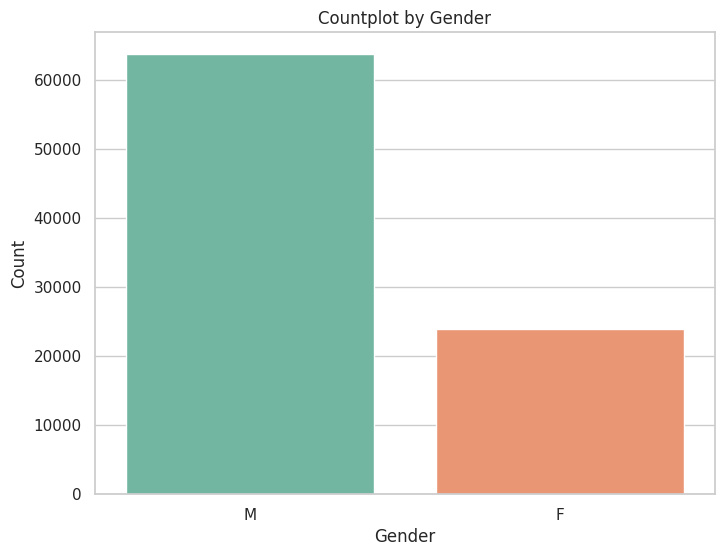

In [287]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create the countplot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df_final, palette='Set2')

# Add title and labels
plt.title('Countplot by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()

#### we see that males have more ratings in this dataset

### Plot 2: the number of ratings by occupation

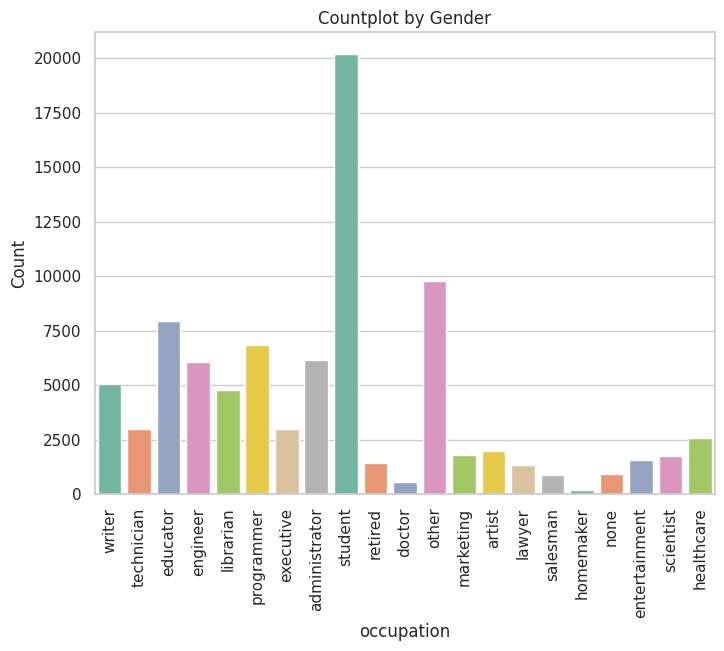

In [288]:
# Create the countplot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='occupation', data=df_final, palette='Set2')

# Add title and labels
plt.xticks(rotation=90)
plt.title('Countplot by Gender')
plt.xlabel('occupation')
plt.ylabel('Count')

# Show the plot
plt.show()

#### we see that students are the most type who rated in this dataset

### Plot 3:the number of ratings by movie type

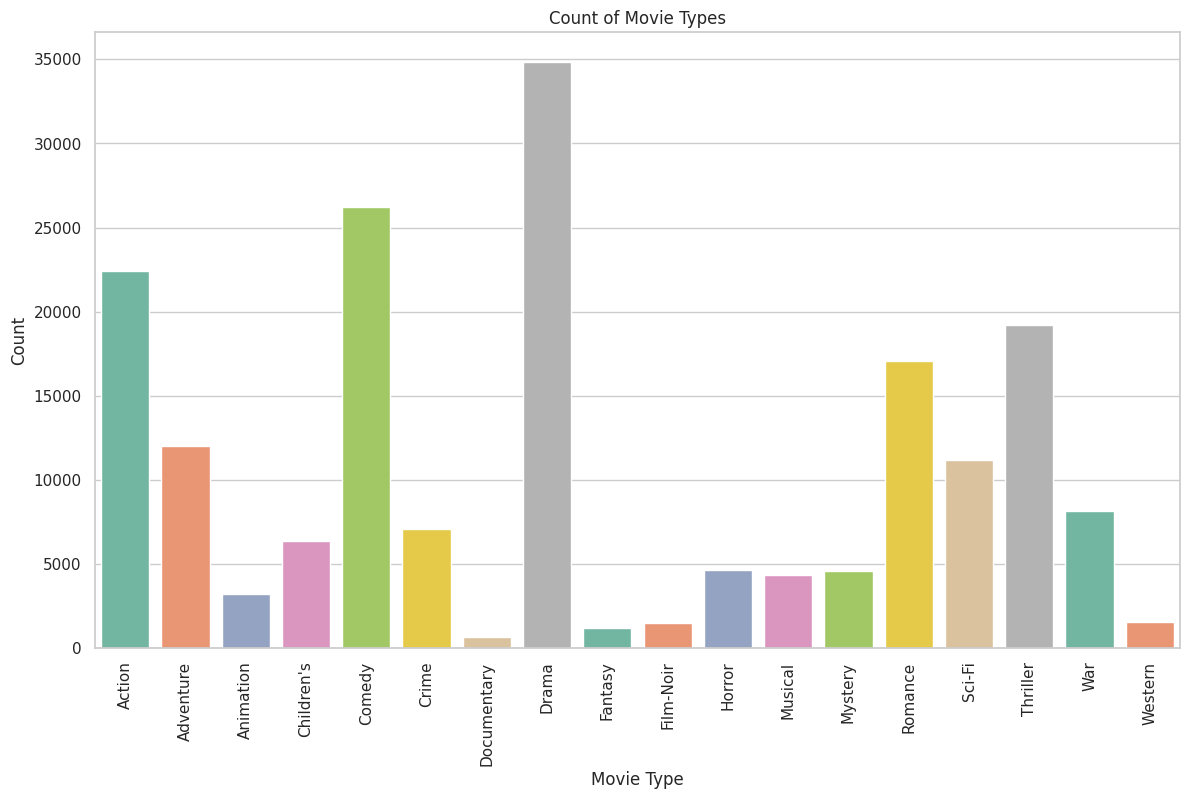

In [289]:
movie_type_columns = [ 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western' ]
df_movie_types = df_final[movie_type_columns]
movie_counts = df_movie_types.sum()
movie_counts = movie_counts.reset_index() 
movie_counts.columns = ['Movie_Type', 'Count'] 
# Plot the counts using Seaborn 
sns.set(style="whitegrid") 
plt.figure(figsize=(14, 8)) 
sns.barplot(x='Movie_Type', y='Count', data=movie_counts, palette='Set2') 
# Add title and labels
plt.xticks(rotation=90)
plt.title('Count of Movie Types') 
plt.xlabel('Movie Type') 
plt.ylabel('Count') 
# Rotate x-axis labels for better readability plt.xticks(rotation=45) 
# Show the plot 
plt.show()

#### we see that the top 3 are drama,comedy and action

### Plot 4:the number of users by age

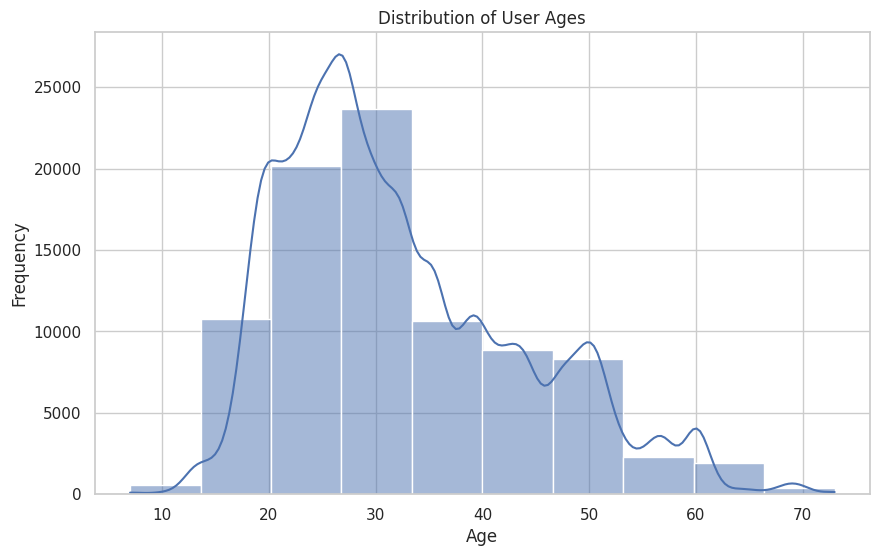

In [290]:
# Plot the distribution of user ages
plt.figure(figsize=(10, 6))
sns.histplot(df_final['age'], bins=10, kde=True)
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


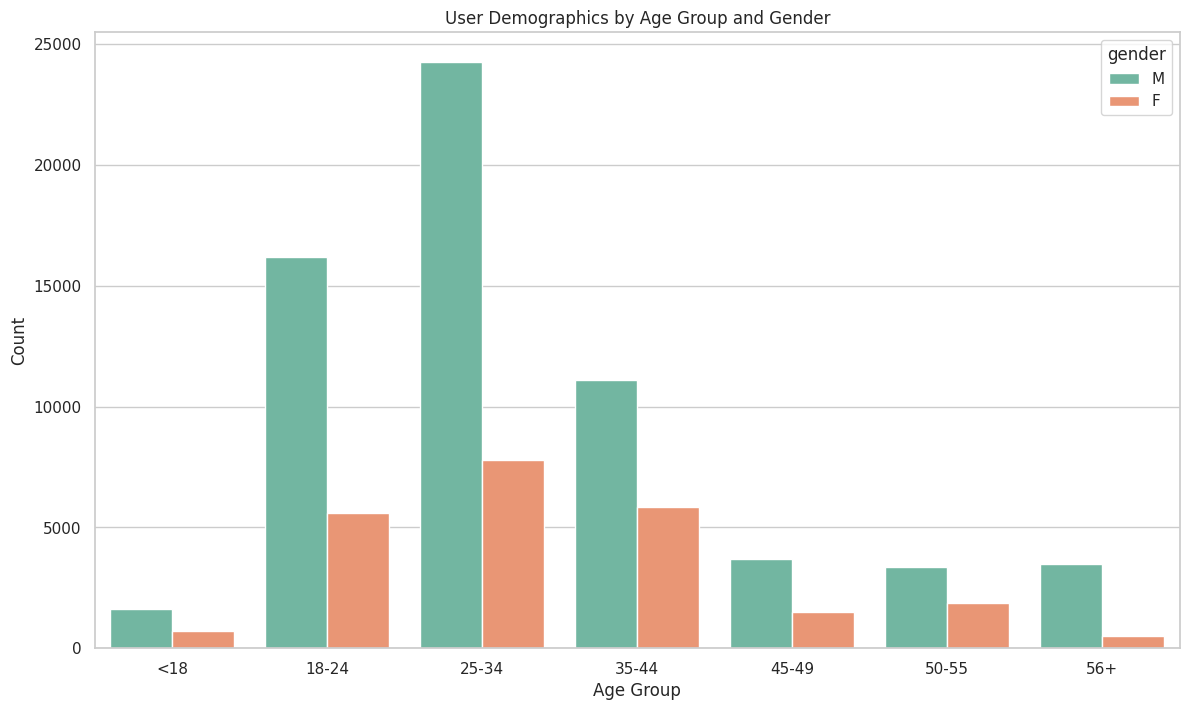

In [291]:
# Define age groups
bins = [0, 18, 25, 35, 45, 50, 56, 100]
labels = ['<18', '18-24', '25-34', '35-44', '45-49', '50-55', '56+']
df_final['age_group'] = pd.cut(df_final['age'], bins=bins, labels=labels, right=False, include_lowest=True)

# Plot the count of users by age group and gender
plt.figure(figsize=(14, 8))
sns.countplot(x='age_group', hue='gender', data=df_final, palette='Set2')
plt.title('User Demographics by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

#### we see that young people are the majortity in this dataset

### Plot 5: the most ratings given in this dataset

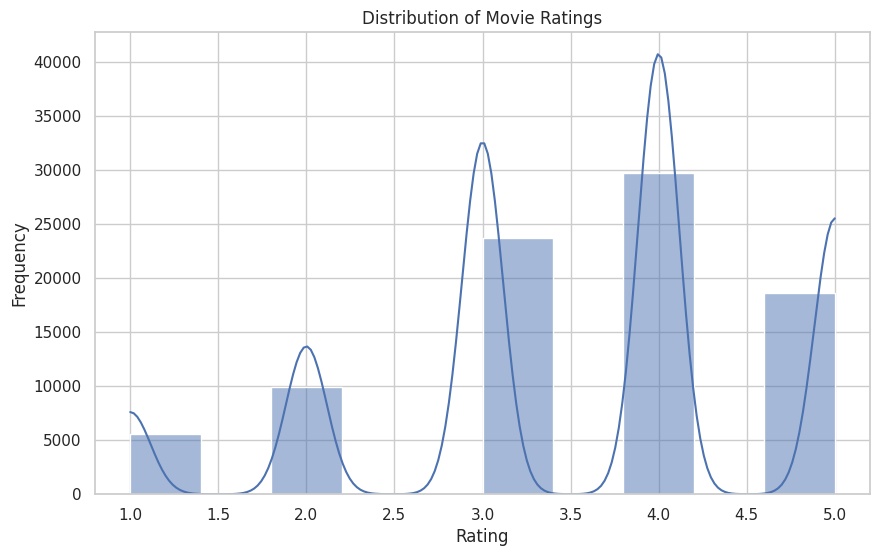

In [292]:
# Remove infinite values
df_final = df_final.replace([np.inf, -np.inf], np.nan).dropna(subset=['rating'])

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df_final['rating'], bins=10, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


#### we see that rating 4 is the most common rating in this dataset

### Plot 6:the number of ratings by gender

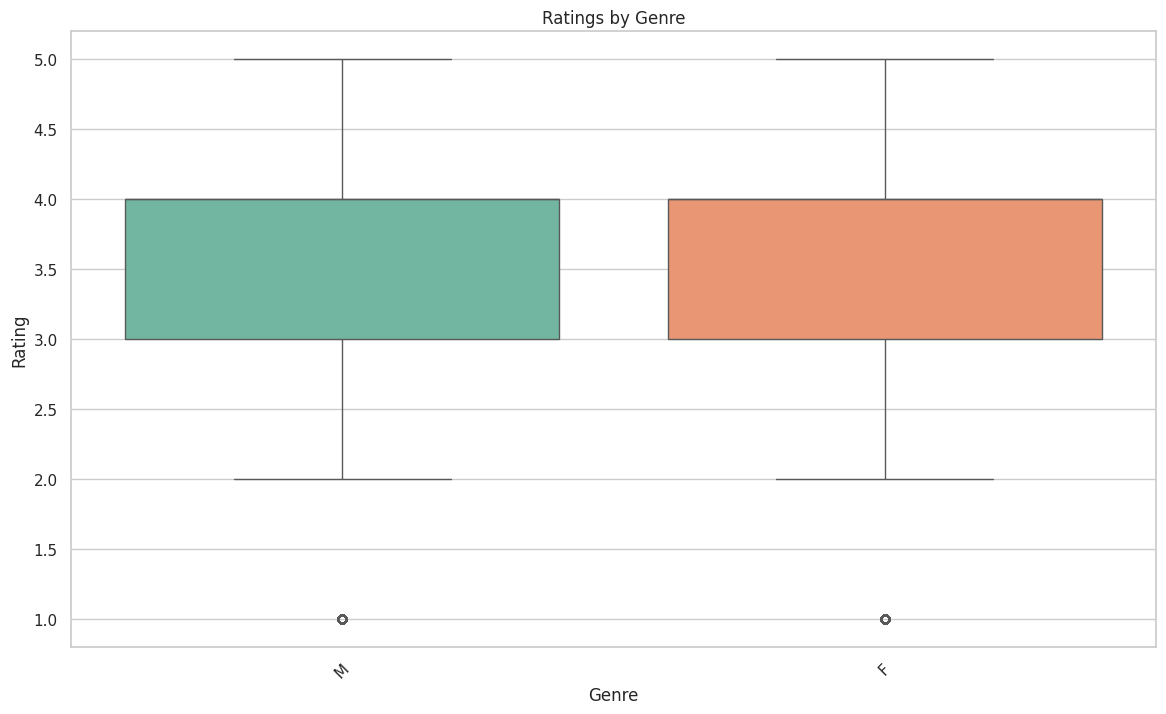

In [293]:
# Plot the ratings by genre
plt.figure(figsize=(14, 8))
sns.boxplot(x='gender', y='rating', data=df_final, palette='Set2')
plt.title('Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


#### we see that both gender have the same distribution

### plot 7:the top 20 rated movies

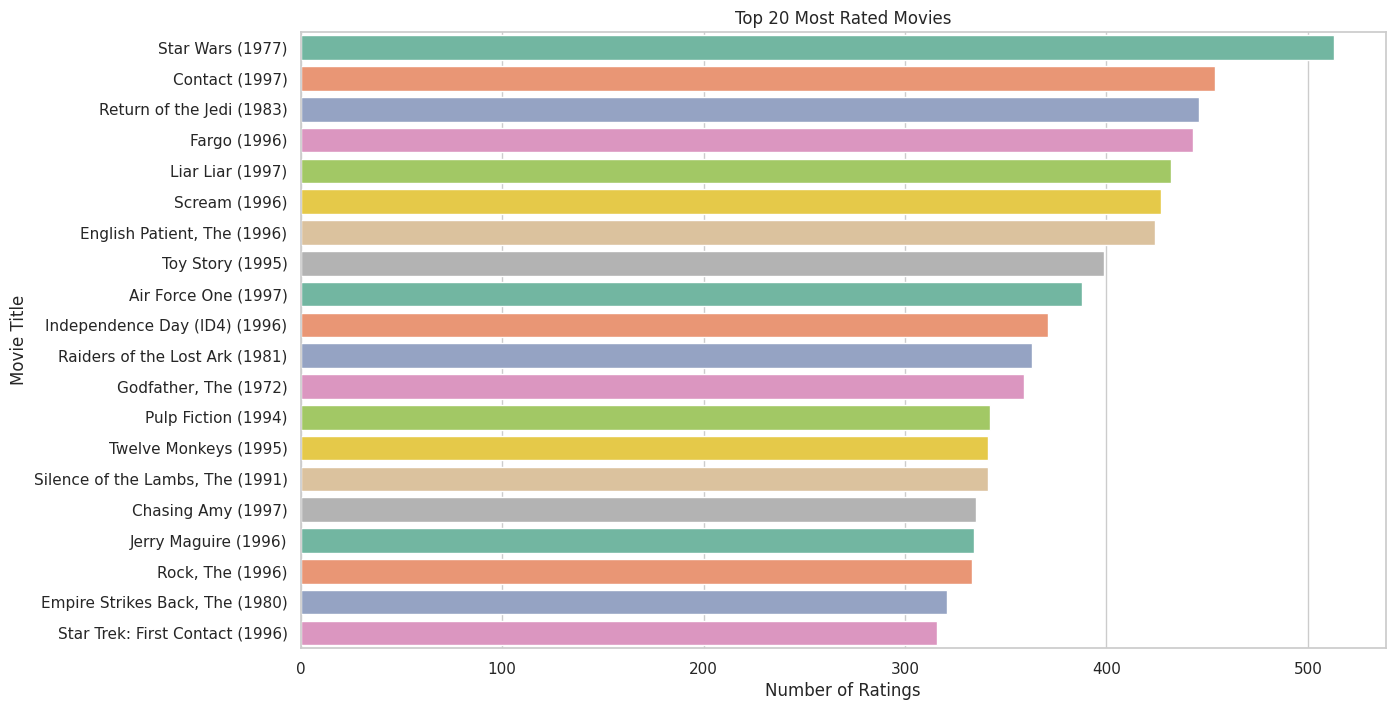

In [294]:
# Count the number of ratings for each movie
popular_movies = df_final['movie_title'].value_counts().reset_index()
popular_movies.columns = ['Movie Title', 'Count']

# Plot the most popular movies
plt.figure(figsize=(14, 8))
sns.barplot(x='Count', y='Movie Title', data=popular_movies.head(20), palette='Set2')
plt.title('Top 20 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()


### Plot 8:the highest rated movies

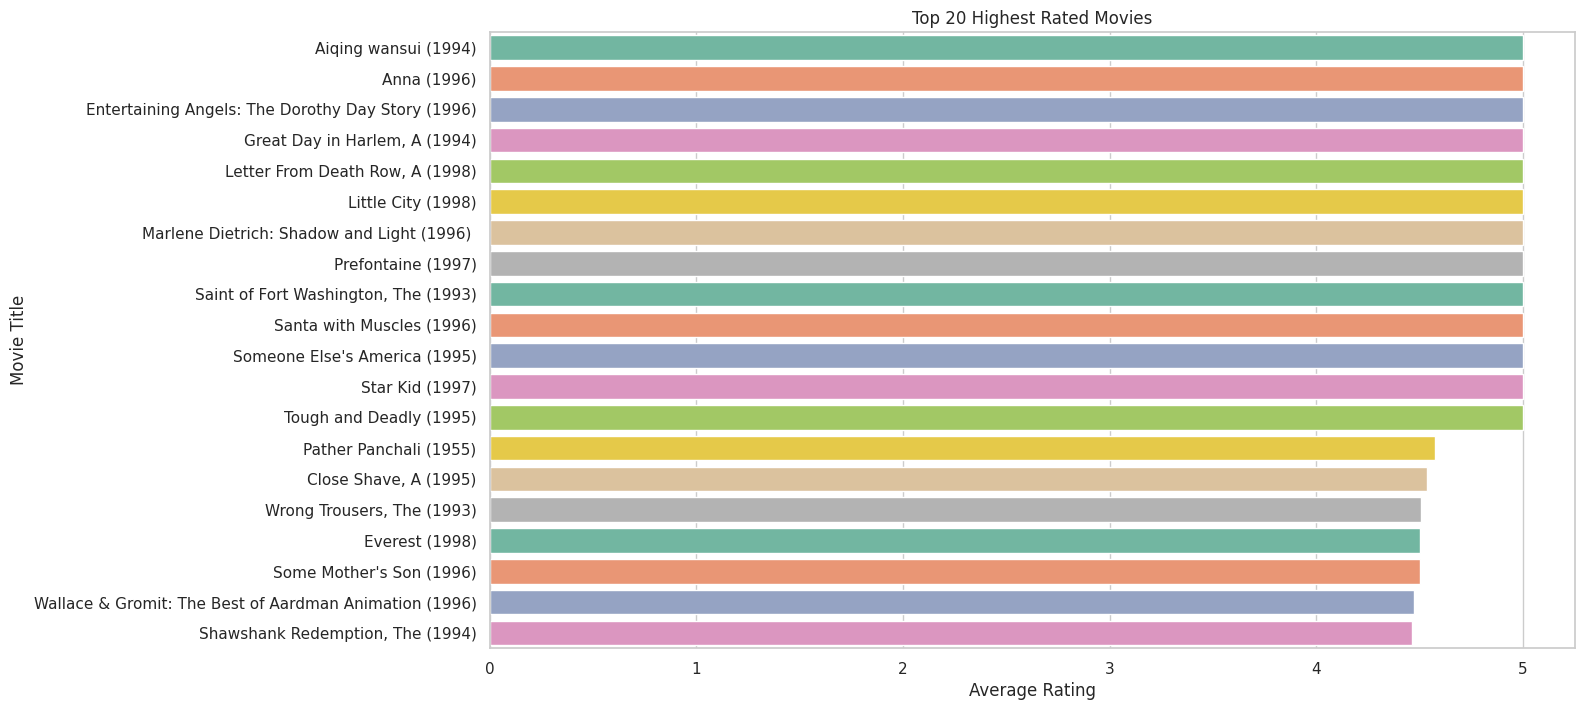

In [295]:
# Calculate the average rating for each movie
avg_ratings = df_final.groupby('movie_title')['rating'].mean().reset_index()
avg_ratings.columns = ['Movie Title', 'Average Rating']

# Plot the top 20 highest rated movies
plt.figure(figsize=(14, 8))
sns.barplot(x='Average Rating', y='Movie Title', data=avg_ratings.nlargest(20, 'Average Rating'), palette='Set2')
plt.title('Top 20 Highest Rated Movies')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.show()


#### we cannot take so much information from that plot given that a movie can be rated only once 5

### Plot 9:Average rating for each genre

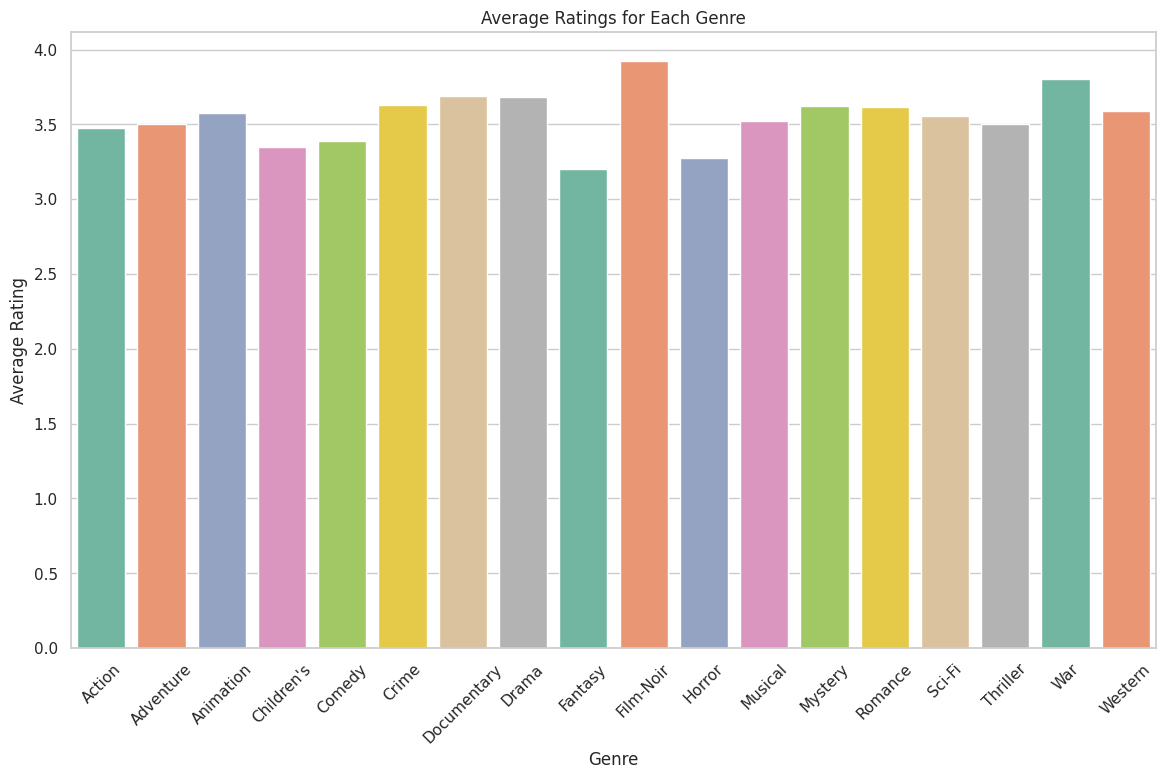

In [296]:

movie_genre_columns = [
    'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
    'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 
    'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
]

# Calculate average ratings for each genre
genre_ratings = {}
for genre in movie_genre_columns:
    genre_ratings[genre] = df_final.loc[df_final[genre] == 1, 'rating'].mean()

# Convert the dictionary to a DataFrame for plotting
genre_ratings_df = pd.DataFrame(list(genre_ratings.items()), columns=['Genre', 'Average Rating'])

# Plot the average ratings for each genre
plt.figure(figsize=(14, 8))
sns.barplot(x='Genre', y='Average Rating', data=genre_ratings_df, palette='Set2')
plt.title('Average Ratings for Each Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


#### we see that war and drama have the highest rating average

### Plot 10:Average rating by genre for each gender

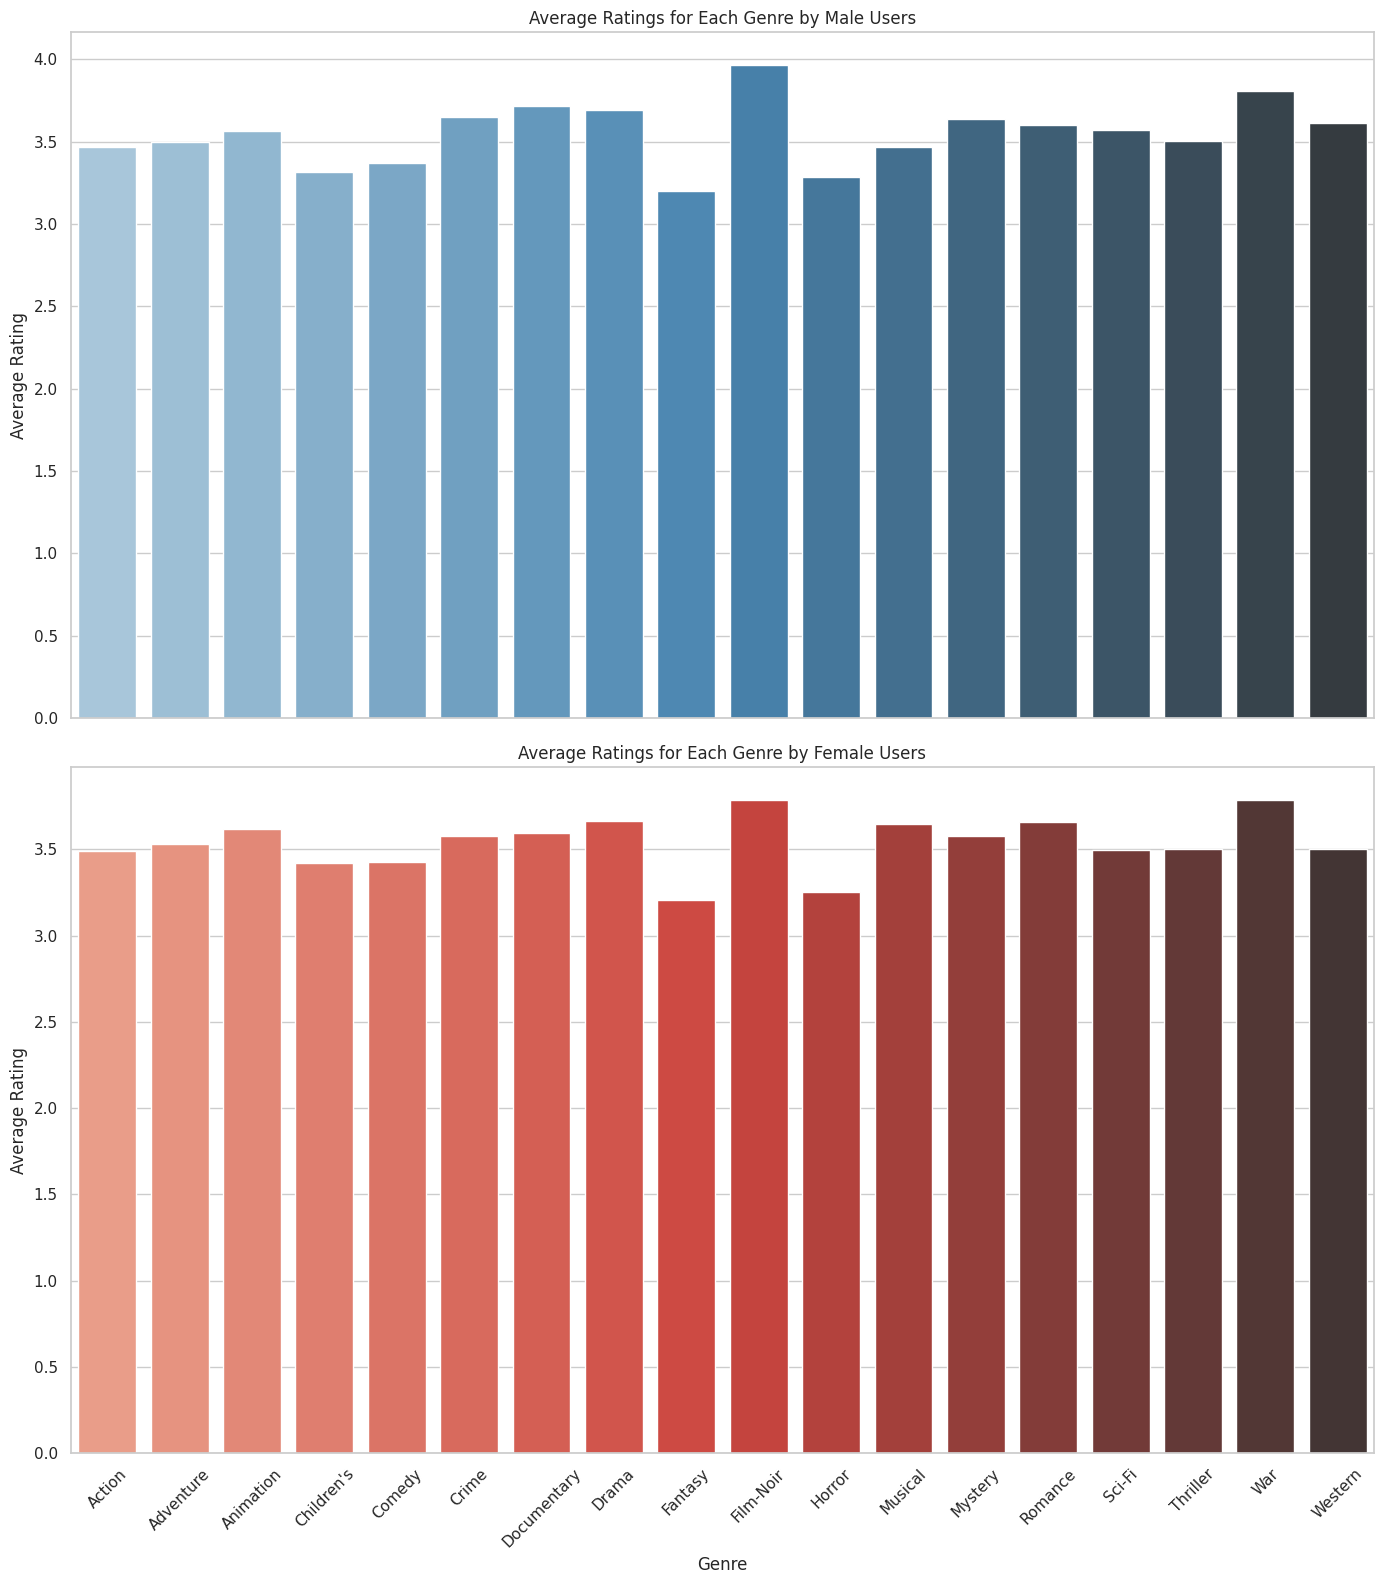

In [297]:
# List of columns representing movie genres
movie_genre_columns = [
    'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
    'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 
    'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
]

# Calculate average ratings for each genre by gender
genre_ratings_male = {}
genre_ratings_female = {}

for genre in movie_genre_columns:
    genre_ratings_male[genre] = df_final.loc[(df_final[genre] == 1) & (df_final['gender'] == 'M'), 'rating'].mean()
    genre_ratings_female[genre] = df_final.loc[(df_final[genre] == 1) & (df_final['gender'] == 'F'), 'rating'].mean()

# Convert the dictionaries to DataFrames for plotting
genre_ratings_male_df = pd.DataFrame(list(genre_ratings_male.items()), columns=['Genre', 'Average Rating (Male)'])
genre_ratings_female_df = pd.DataFrame(list(genre_ratings_female.items()), columns=['Genre', 'Average Rating (Female)'])

# Plot the average ratings for each genre by gender
fig, axes = plt.subplots(2, 1, figsize=(14, 16), sharex=True)

sns.barplot(ax=axes[0], x='Genre', y='Average Rating (Male)', data=genre_ratings_male_df, palette='Blues_d')
axes[0].set_title('Average Ratings for Each Genre by Male Users')
axes[0].set_xlabel('')
axes[0].set_ylabel('Average Rating')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(ax=axes[1], x='Genre', y='Average Rating (Female)', data=genre_ratings_female_df, palette='Reds_d')
axes[1].set_title('Average Ratings for Each Genre by Female Users')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Average Rating')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


#### we see that both male and female like film-noir and war the most 

In [298]:
df_final["gender"].value_counts()

gender
M    63736
F    23884
Name: count, dtype: int64

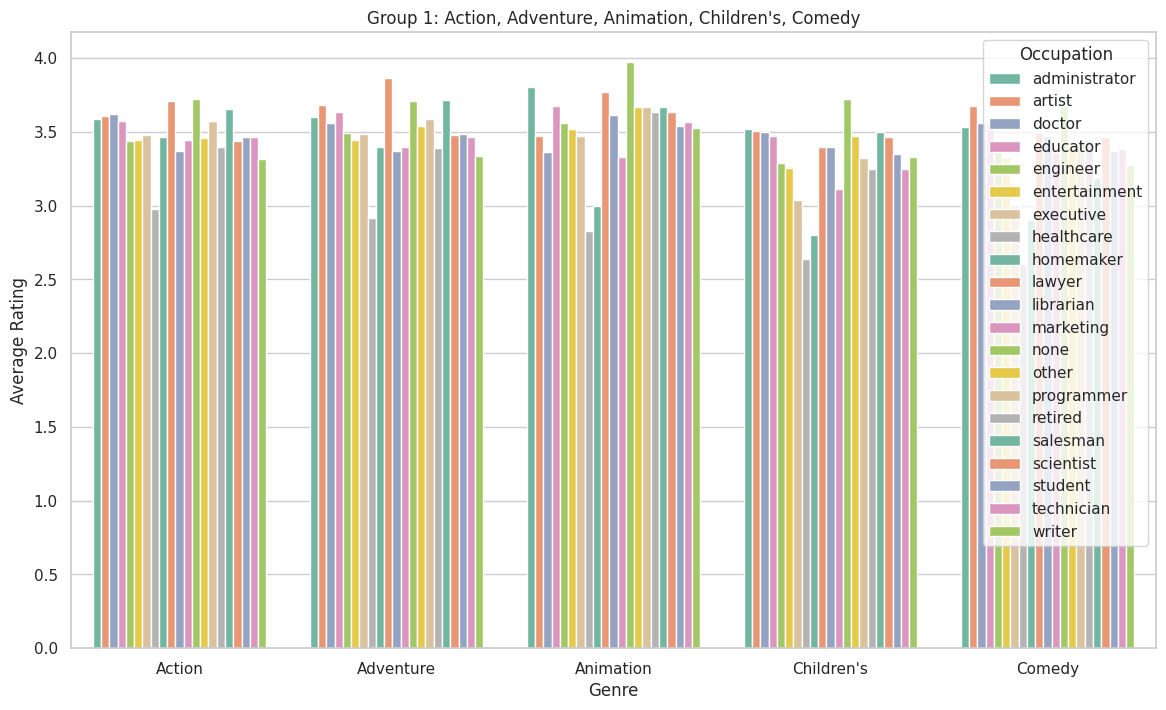

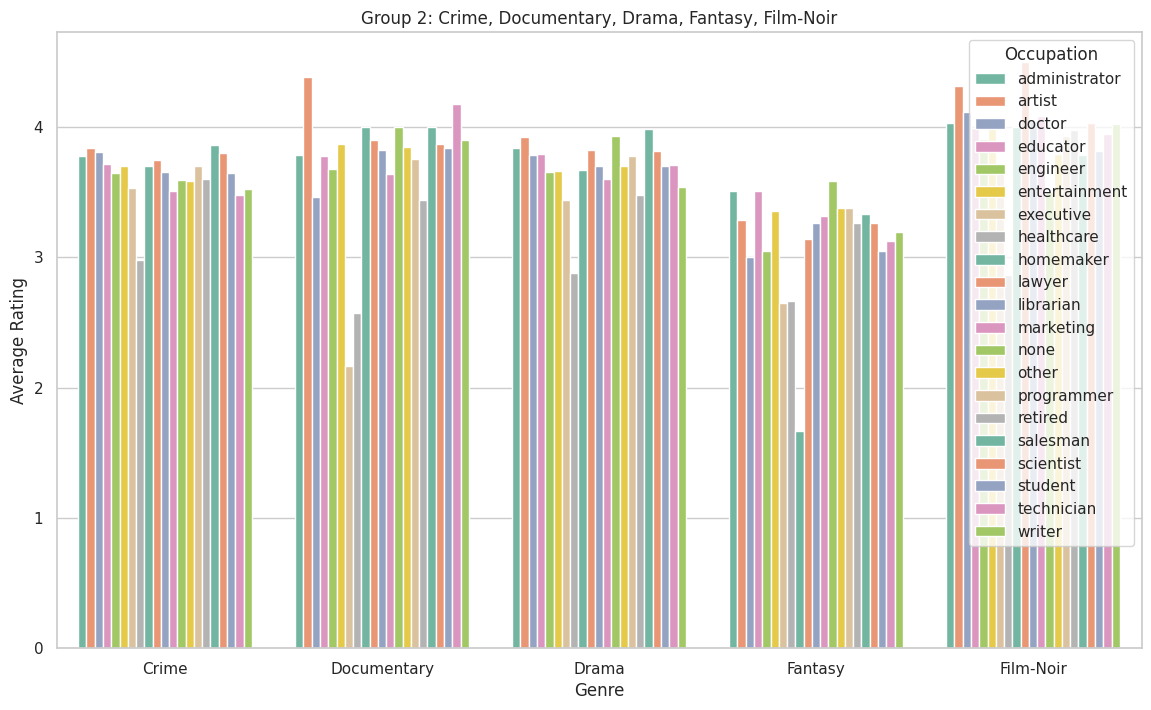

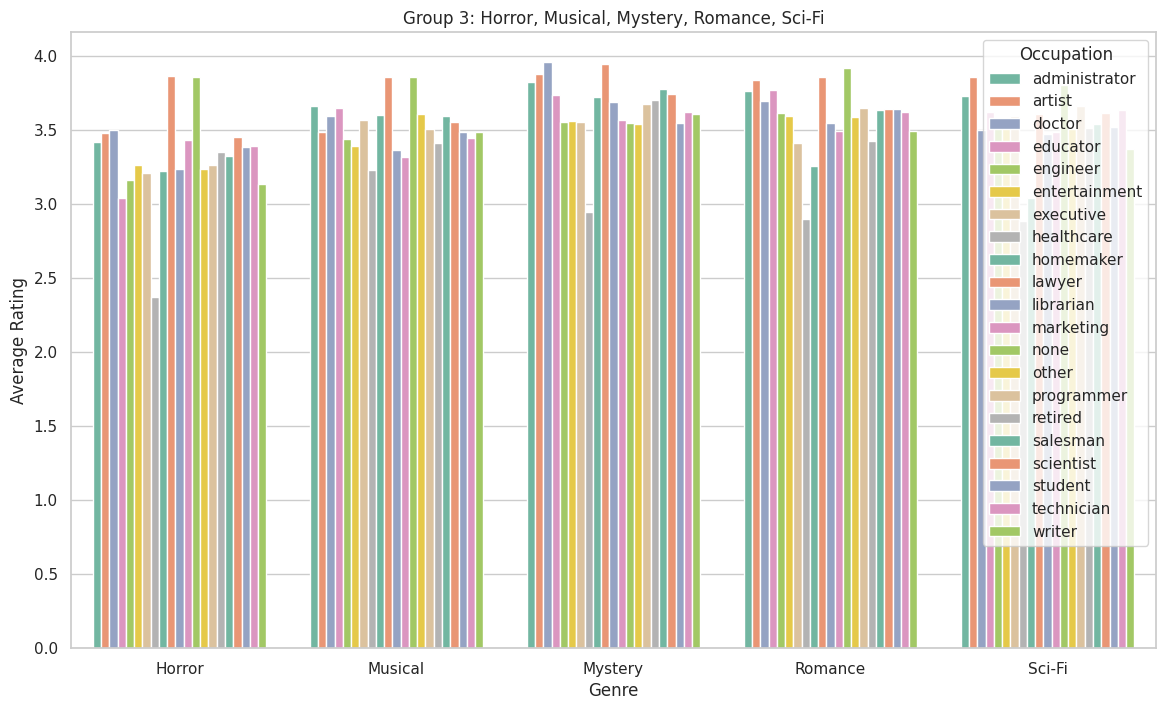

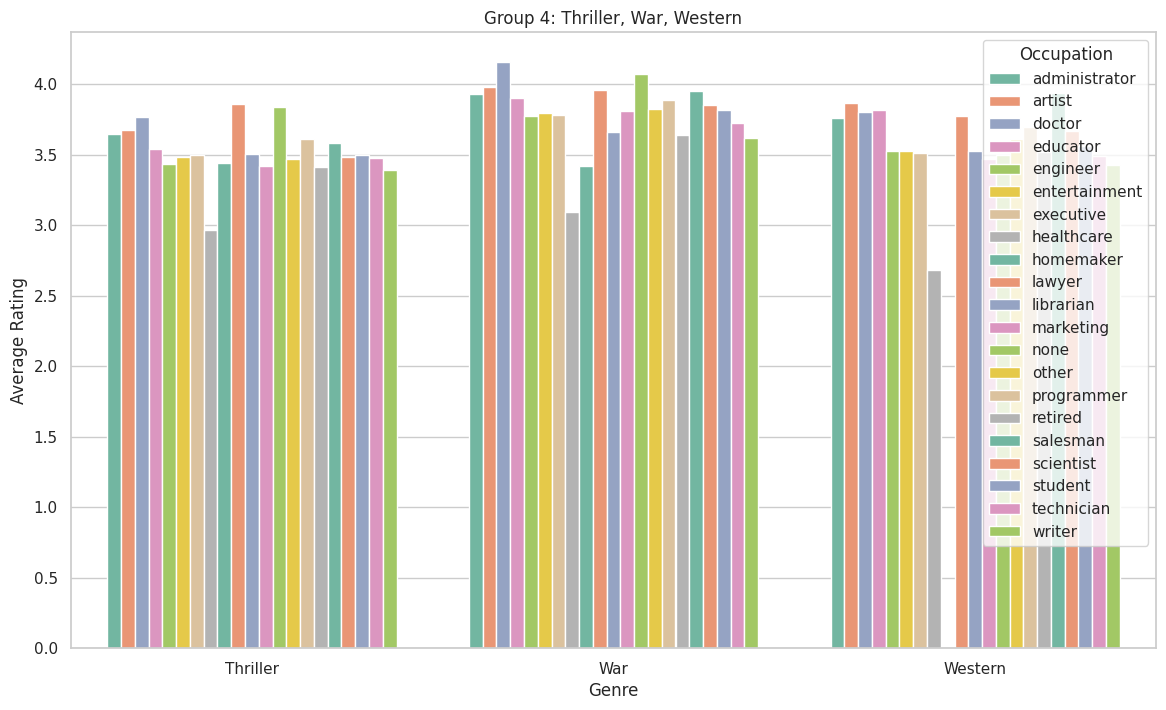

In [299]:
# Function to plot genre preferences by occupation
def plot_genre_preferences(genre_list, title):
    genre_ratings = []
    for genre in genre_list:
        ratings = df_final[df_final[genre] == 1].groupby('occupation')['rating'].mean().reset_index()
        ratings['Genre'] = genre
        genre_ratings.append(ratings)
    
    genre_ratings_df = pd.concat(genre_ratings, ignore_index=True)

    plt.figure(figsize=(14, 8))
    sns.barplot(x='Genre', y='rating', hue='occupation', data=genre_ratings_df, palette='Set2')
    plt.title(title)
    plt.xlabel('Genre')
    plt.ylabel('Average Rating')
    plt.legend(title='Occupation')
    plt.show()

# Define genre groups
genre_groups = {
    'Group 1: Action, Adventure, Animation, Children\'s, Comedy': ['Action', 'Adventure', 'Animation', "Children's", 'Comedy'],
    'Group 2: Crime, Documentary, Drama, Fantasy, Film-Noir': ['Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir'],
    'Group 3: Horror, Musical, Mystery, Romance, Sci-Fi': ['Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi'],
    'Group 4: Thriller, War, Western': ['Thriller', 'War', 'Western']
}

# Plot each group
for title, genres in genre_groups.items():
    plot_genre_preferences(genres, title)


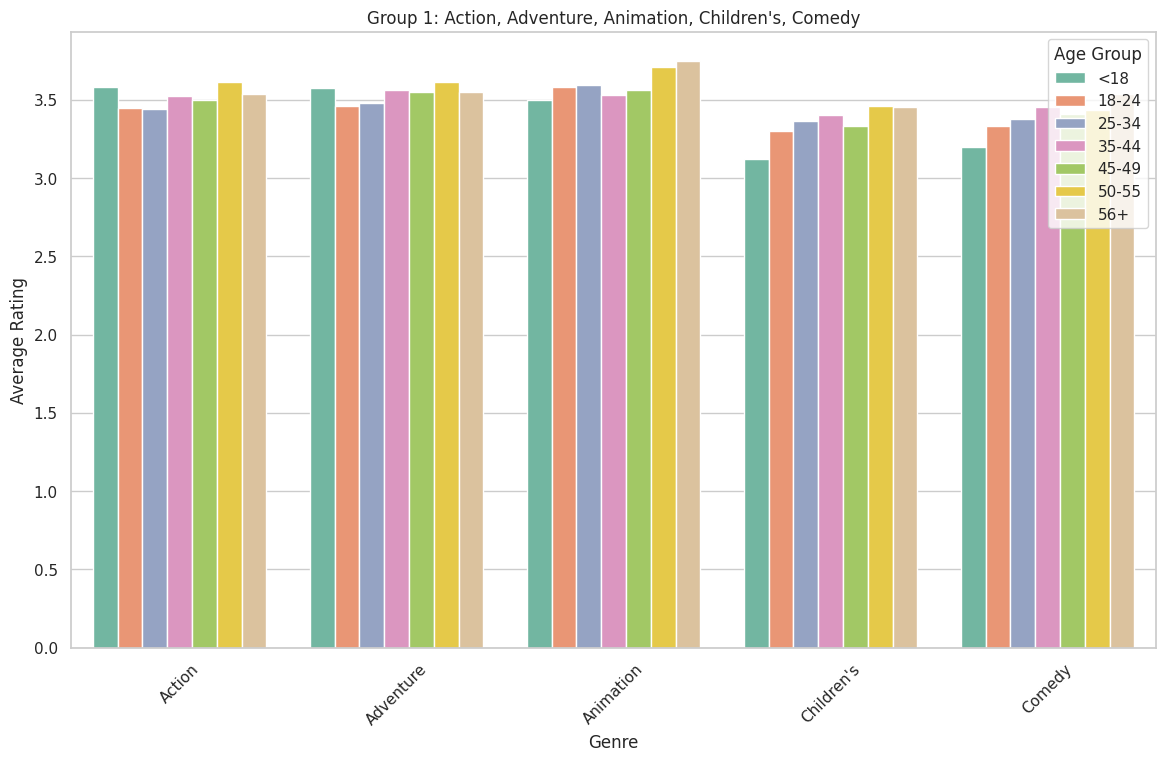

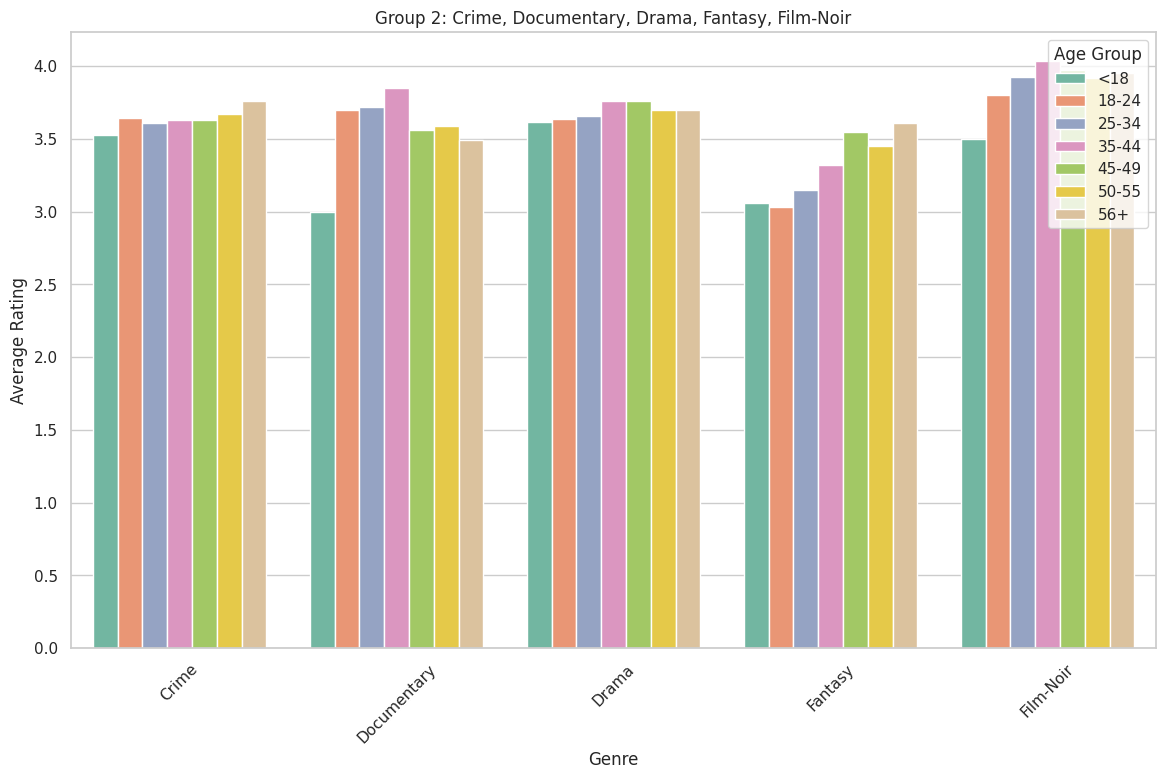

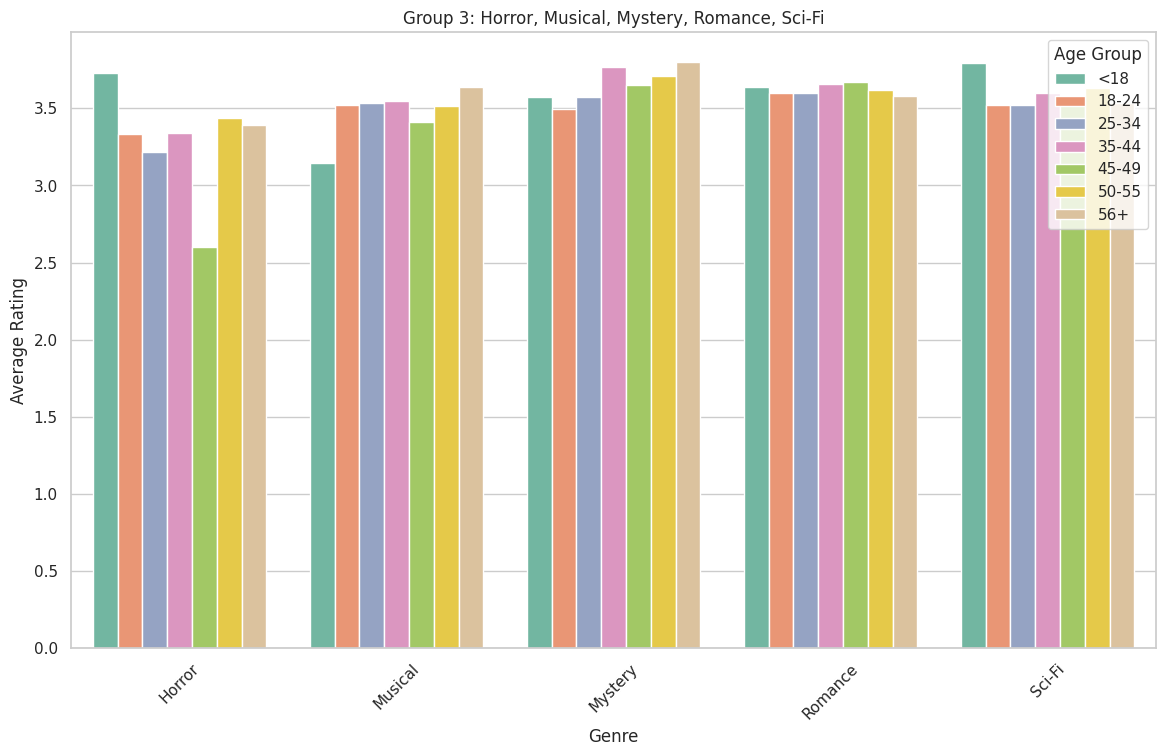

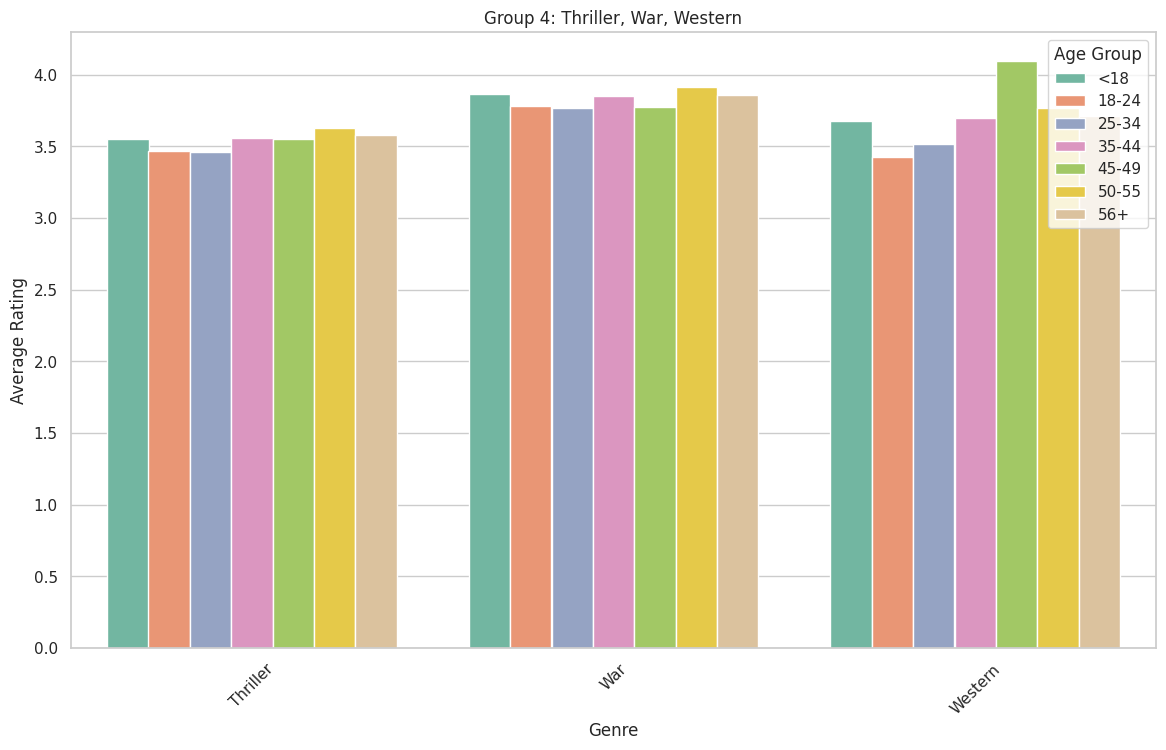

In [300]:
# Define age groups
bins = [0, 18, 25, 35, 45, 50, 56, 100]
labels = ['<18', '18-24', '25-34', '35-44', '45-49', '50-55', '56+']
df_final['age_group'] = pd.cut(df_final['age'], bins=bins, labels=labels, right=False, include_lowest=True)

# Function to plot genre preferences by age group
def plot_genre_preferences(genre_list, title):
    genre_ratings = []
    for genre in genre_list:
        ratings = df_final[df_final[genre] == 1].groupby('age_group', observed=True)['rating'].mean().reset_index()
        ratings['Genre'] = genre
        genre_ratings.append(ratings)
    
    genre_ratings_df = pd.concat(genre_ratings, ignore_index=True)

    plt.figure(figsize=(14, 8))
    sns.barplot(x='Genre', y='rating', hue='age_group', data=genre_ratings_df, palette='Set2')
    plt.title(title)
    plt.xlabel('Genre')
    plt.ylabel('Average Rating')
    plt.legend(title='Age Group')
    plt.xticks(rotation=45)
    plt.show()

# Define genre groups
genre_groups = {
    'Group 1: Action, Adventure, Animation, Children\'s, Comedy': ['Action', 'Adventure', 'Animation', "Children's", 'Comedy'],
    'Group 2: Crime, Documentary, Drama, Fantasy, Film-Noir': ['Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir'],
    'Group 3: Horror, Musical, Mystery, Romance, Sci-Fi': ['Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi'],
    'Group 4: Thriller, War, Western': ['Thriller', 'War', 'Western']
}

# Plot each group
for title, genres in genre_groups.items():
    plot_genre_preferences(genres, title)


### Collaborative filtering Bayesian Personalized Ranking (BPR)

In [301]:
import os
import sys
import cornac
import pandas as pd

from recommenders.datasets.python_splitters import python_random_split
from recommenders.evaluation.python_evaluation import map, ndcg_at_k, precision_at_k, recall_at_k
from recommenders.models.cornac.cornac_utils import predict_ranking
from recommenders.utils.timer import Timer
from recommenders.utils.constants import SEED
from recommenders.utils.notebook_utils import store_metadata

print(f"System version: {sys.version}")
print(f"Cornac version: {cornac.__version__}")

System version: 3.10.14 | packaged by conda-forge | (main, Mar 20 2024, 12:45:18) [GCC 12.3.0]
Cornac version: 2.3.0


In [302]:
# Select MovieLens data size: 100k, 1m, 10m, or 20m
MOVIELENS_DATA_SIZE = '100k'

# top k items to recommend
TOP_K = 10

# Model parameters
NUM_FACTORS = 200
NUM_EPOCHS = 100

In [303]:
df_2=df[["user_id","movie_id","rating"]]

In [304]:
train, test = python_random_split(df_2, 0.75)

In [305]:
from cornac.data import Dataset
train_set = Dataset.from_uir(train.itertuples(index=False), seed=SEED) 
print('Number of users: {}'.format(train_set.num_users)) 
print('Number of items: {}'.format(train_set.num_items))

Number of users: 943
Number of items: 1642


In [306]:
bpr = cornac.models.BPR(
    k=NUM_FACTORS,
    max_iter=NUM_EPOCHS,
    learning_rate=0.01,
    lambda_reg=0.001,
    verbose=True,
    seed=SEED
)

In [307]:
with Timer() as t:
    bpr.fit(train_set)
print("Took {} seconds for training.".format(t))

  0%|          | 0/100 [00:00<?, ?it/s]

Optimization finished!
Took 2.9137 seconds for training.


In [308]:
with Timer() as t:
    all_predictions = predict_ranking(bpr, train, usercol='user_id', itemcol='movie_id', remove_seen=True)
print("Took {} seconds for prediction.".format(t))

Took 1.6518 seconds for prediction.


In [309]:
all_predictions.head()

,user_id,movie_id,prediction
0,1,1,3.917794
3,1,4,2.972839
5,1,6,-0.691013
7,1,8,2.865882
9,1,10,1.761243


In [310]:
from recommenders.evaluation.python_evaluation import (
    map, ndcg_at_k, precision_at_k, recall_at_k
)

# Define the evaluation metric
k = 10

# Evaluate the predictions
eval_map = map(test, all_predictions, col_user='user_id', col_item='movie_id', col_rating='rating', col_prediction='prediction', k=k)
eval_ndcg = ndcg_at_k(test, all_predictions, col_user='user_id', col_item='movie_id', col_rating='rating', col_prediction='prediction', k=k)
eval_precision = precision_at_k(test, all_predictions, col_user='user_id', col_item='movie_id', col_rating='rating', col_prediction='prediction', k=k)
eval_recall = recall_at_k(test, all_predictions, col_user='user_id', col_item='movie_id', col_rating='rating', col_prediction='prediction', k=k)

# Calculate F1-score
if (eval_precision + eval_recall) > 0:
    eval_f1 = 2 * (eval_precision * eval_recall) / (eval_precision + eval_recall)
else:
    eval_f1 = 0.0

# Print the evaluation results
print(
    "MAP:\t%f" % eval_map,
    "NDCG:\t%f" % eval_ndcg,
    "Precision@K:\t%f" % eval_precision,
    "Recall@K:\t%f" % eval_recall,
    "F1-score@K:\t%f" % eval_f1,
    sep='\n'
)


MAP:	0.110293
NDCG:	0.407024
Precision@K:	0.359873
Recall@K:	0.183517
F1-score@K:	0.243077


### Collaborative filtering Bayesian Personalized Ranking (BPR) with hyperparameters tuning

In [311]:
import pandas as pd
import numpy as np
from cornac.data import Dataset
from cornac.models import BPR
from cornac.eval_methods import BaseMethod
from cornac.utils import cache
from sklearn.model_selection import ParameterGrid, KFold
from recommenders.evaluation.python_evaluation import map, ndcg_at_k, precision_at_k, recall_at_k

# Define constants
MOVIELENS_DATA_SIZE = '100k'
TOP_K = 10
NUM_EPOCHS = 100
SEED = 42

# Assume df and df_items are your DataFrames
df_2 = df[["user_id", "movie_id", "rating"]]

# Create train and test sets
kf = KFold(n_splits=5, shuffle=True, random_state=SEED)
train_index, test_index = next(kf.split(df_2))
train = df_2.iloc[train_index]
test = df_2.iloc[test_index]

# Convert train set to Cornac Dataset
train_set = Dataset.from_uir(train.itertuples(index=False), seed=SEED)

# Define parameter grid for grid search
param_grid = {
    'k': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'lambda_reg': [0.001, 0.01, 0.1]
}

best_score = float('-inf')
best_params = None
best_model = None

# Perform Grid Search with Cross Validation
for params in ParameterGrid(param_grid):
    print(f"Evaluating with params: {params}")
    fold_scores = []
    
    for train_index, val_index in kf.split(df_2):
        train_fold = df_2.iloc[train_index]
        val_fold = df_2.iloc[val_index]
        
        train_set_fold = Dataset.from_uir(train_fold.itertuples(index=False), seed=SEED)
        
        model = BPR(
            k=params['k'],
            max_iter=NUM_EPOCHS,
            learning_rate=params['learning_rate'],
            lambda_reg=params['lambda_reg'],
            verbose=False,
            seed=SEED
        )
        
        with Timer() as t:
            model.fit(train_set_fold)
        
        # Predict rankings
        with Timer() as t:
            all_predictions = predict_ranking(model, train_fold, usercol='user_id', itemcol='movie_id', remove_seen=True)
        
        # Evaluate
        eval_precision = precision_at_k(val_fold, all_predictions, col_user='user_id', col_item='movie_id', col_rating='rating', col_prediction='prediction', k=TOP_K)
        fold_scores.append(eval_precision)
    
    avg_score = np.mean(fold_scores)
    
    if avg_score > best_score:
        best_score = avg_score
        best_params = params
        best_model = model

print(f"Best parameters: {best_params} with score: {best_score}")

# Evaluate the best model on the test set
all_predictions = predict_ranking(best_model, train, usercol='user_id', itemcol='movie_id', remove_seen=True)

# Compute evaluation metrics on the test set
eval_map = map(test, all_predictions, col_user='user_id', col_item='movie_id', col_rating='rating', col_prediction='prediction', k=TOP_K)
eval_ndcg = ndcg_at_k(test, all_predictions, col_user='user_id', col_item='movie_id', col_rating='rating', col_prediction='prediction', k=TOP_K)
eval_precision = precision_at_k(test, all_predictions, col_user='user_id', col_item='movie_id', col_rating='rating', col_prediction='prediction', k=TOP_K)
eval_recall = recall_at_k(test, all_predictions, col_user='user_id', col_item='movie_id', col_rating='rating', col_prediction='prediction', k=TOP_K)

# Calculate F1-score
if (eval_precision + eval_recall) > 0:
    eval_f1 = 2 * (eval_precision * eval_recall) / (eval_precision + eval_recall)
else:
    eval_f1 = 0.0

# Print the evaluation results
print(
    "MAP:\t%f" % eval_map,
    "NDCG:\t%f" % eval_ndcg,
    "Precision@K:\t%f" % eval_precision,
    "Recall@K:\t%f" % eval_recall,
    "F1-score@K:\t%f" % eval_f1,
    sep='\n'
)

# Generate recommendations for users
def recommend_items_for_users(user_ids, all_predictions, num_recommendations=TOP_K):
    recommendations = {}
    for user_id in user_ids:
        user_recs = all_predictions[all_predictions['user_id'] == user_id].nlargest(num_recommendations, 'prediction')
        recommendations[user_id] = [df_items.loc[movie_id, 'movie_title'] for movie_id in user_recs['movie_id']]
    return recommendations

# Example usage
user_ids_to_recommend = df_2['user_id'].unique()[:3]  # Replace with actual user IDs

# Generate recommendations with the predictions
user_recommendations = recommend_items_for_users(user_ids_to_recommend, all_predictions)

# Display recommendations
for user_id, recommended_titles in user_recommendations.items():
    print(f"Recommendations for User {user_id}: {recommended_titles}")


Evaluating with params: {'k': 100, 'lambda_reg': 0.001, 'learning_rate': 0.01}
Evaluating with params: {'k': 100, 'lambda_reg': 0.001, 'learning_rate': 0.05}
Evaluating with params: {'k': 100, 'lambda_reg': 0.001, 'learning_rate': 0.1}
Evaluating with params: {'k': 100, 'lambda_reg': 0.01, 'learning_rate': 0.01}
Evaluating with params: {'k': 100, 'lambda_reg': 0.01, 'learning_rate': 0.05}
Evaluating with params: {'k': 100, 'lambda_reg': 0.01, 'learning_rate': 0.1}
Evaluating with params: {'k': 100, 'lambda_reg': 0.1, 'learning_rate': 0.01}
Evaluating with params: {'k': 100, 'lambda_reg': 0.1, 'learning_rate': 0.05}
Evaluating with params: {'k': 100, 'lambda_reg': 0.1, 'learning_rate': 0.1}
Evaluating with params: {'k': 200, 'lambda_reg': 0.001, 'learning_rate': 0.01}
Evaluating with params: {'k': 200, 'lambda_reg': 0.001, 'learning_rate': 0.05}
Evaluating with params: {'k': 200, 'lambda_reg': 0.001, 'learning_rate': 0.1}
Evaluating with params: {'k': 200, 'lambda_reg': 0.01, 'learning_

### Content based recommondation system

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_5       │ (None, 18)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_2        │ (None, 32)        │     38,048 │ input_layer_4[0]… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_3        │ (None, 32)        │     41,888 │ input_layer_5[0]… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l2_normalization_l… │ (None, 32)        │          0 │ sequential_2[0][… │
│ (L2NormalizationLa… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l2_normalization_l… │ (None, 32)        │          0 │ sequential_3[0][… │
│ (L2NormalizationLa… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot_1 (Dot)         │ (None, 1)         │          0 │ l2_normalization… │
│                     │                   │            │ l2_normalization… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 79,936 (312.25 KB)

 Trainable params: 79,936 (312.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 8.1093
Epoch 2/30
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.6427
Epoch 3/30
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.6403
Epoch 4/30
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.6439
Epoch 5/30
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.6992
Epoch 6/30
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.6488
Epoch 7/30
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.6320
Epoch 8/30
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.6258
Epoch 9/30
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.6315
Epoch 10/30
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.6419
Epoch 11/30
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.6534
Epoch 12/30
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.6606
Epoch 13/30
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.6401
Epoch 14/30
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.6730
Epoch 15/30
1096/1096 ━━━━━━

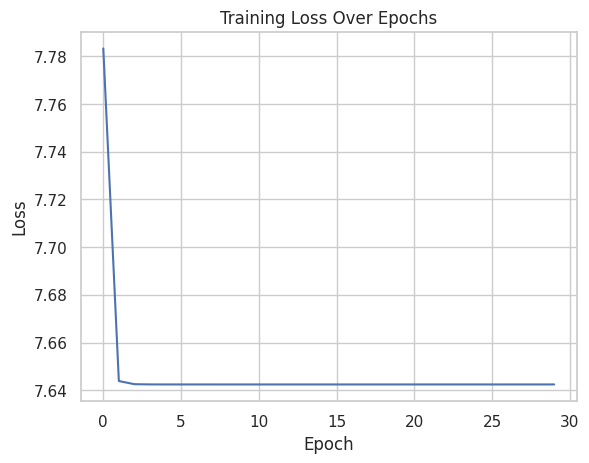

548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.7005
Test Loss: 7.682150363922119
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MAP: 0.012561
NDCG: 0.125610
Precision@K: 0.012561
Recall@K: 0.002339
F1-score@K: 0.003943


In [312]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt


# Prepare user and item features
y = df_final['rating']
user_features = ['age', 'gender', 'occupation']
item_features = ['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

user_data = df_final[user_features]
item_data = df_final[item_features]

# Convert categorical data
user_data.loc[:, 'gender'] = user_data['gender'].astype('category').cat.codes
user_data.loc[:, 'occupation'] = user_data['occupation'].astype('category').cat.codes

# Convert to float32
user_data = user_data.astype(np.float32)
item_data = item_data.astype(np.float32)
y = y.astype(np.float32)

# Split the data
user_train, user_test, item_train, item_test, y_train, y_test = train_test_split(user_data, item_data, y, test_size=0.2, random_state=1)

# Standard scaling
scalerItem = StandardScaler()
item_train = scalerItem.fit_transform(item_train)
item_test = scalerItem.transform(item_test)

scalerUser = StandardScaler()
user_train = scalerUser.fit_transform(user_train)
user_test = scalerUser.transform(user_test)

# Define neural networks
num_outputs = 32

user_NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_outputs, activation='linear'),
])

item_NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_outputs, activation='linear'),
])

class L2NormalizationLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        return tf.linalg.l2_normalize(inputs, axis=1)

input_user = tf.keras.layers.Input(shape=(user_train.shape[1],))
input_item = tf.keras.layers.Input(shape=(item_train.shape[1],))

vu = user_NN(input_user)
vu = L2NormalizationLayer()(vu)
vm = item_NN(input_item)
vm = L2NormalizationLayer()(vm)

output = tf.keras.layers.Dot(axes=1)([vu, vm])

model = Model([input_user, input_item], output)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.MeanSquaredError())

model.summary()

# Train the model
history = model.fit([user_train, item_train], y_train, batch_size=64, epochs=30)

# Plot training loss
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()

# Evaluate model
test_loss = model.evaluate([user_test, item_test], y_test)
print(f'Test Loss: {test_loss}')

# Generate predictions
predictions = model.predict([user_test, item_test])

# Define metric functions
def mean_average_precision_at_k(actual, predicted, k=10):
    score = 0.0
    num_users = len(actual)
    for actual_list, predicted_list in zip(actual, predicted):
        predicted_list = predicted_list[:k]
        hits, sum_precisions = 0.0, 0.0
        for i, p in enumerate(predicted_list):
            if p in actual_list and p not in predicted_list[:i]:
                hits += 1.0
                sum_precisions += hits / (i + 1.0)
        if actual_list:
            score += sum_precisions / min(len(actual_list), k)
    return score / num_users

def ndcg_at_k(actual, predicted, k=10):
    def dcg(relevance_scores):
        return np.sum(relevance_scores / np.log2(np.arange(2, len(relevance_scores) + 2)))
    score = 0.0
    num_users = len(actual)
    for actual_list, predicted_list in zip(actual, predicted):
        predicted_list = predicted_list[:k]
        relevance_scores = [(1 if p in actual_list else 0) for p in predicted_list]
        ideal_relevance_scores = sorted(relevance_scores, reverse=True)
        dcg_max = dcg(ideal_relevance_scores)
        if dcg_max == 0:
            score += 0
        else:
            score += dcg(relevance_scores) / dcg_max
    return score / num_users

def precision_at_k(actual, predicted, k=10):
    score = 0.0
    num_users = len(actual)
    for actual_list, predicted_list in zip(actual, predicted):
        predicted_list = predicted_list[:k]
        score += len(set(predicted_list) & set(actual_list)) / float(k)
    return score / num_users

def recall_at_k(actual, predicted, k=10):
    score = 0.0
    num_users = len(actual)
    for actual_list, predicted_list in zip(actual, predicted):
        predicted_list = predicted_list[:k]
        score += len(set(predicted_list) & set(actual_list)) / float(len(actual_list))
    return score / num_users

def f1_score_at_k(precision, recall):
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Assuming you have actual and predicted lists prepared
user_relevant_items = df_final.groupby('user_id')['movie_id'].apply(list).to_dict()
actual = [user_relevant_items[user_id] if user_id in user_relevant_items else [] for user_id in df_final['user_id'].unique()]

predicted = []
for user_index in range(len(user_test)):
    user_predictions = predictions[user_index]
    top_k_item_indices = np.argsort(-user_predictions)[:10]
    top_k_items = [df_final['movie_id'].unique()[i] for i in top_k_item_indices]
    predicted.append(top_k_items)

# Compute and display metrics
map_score = mean_average_precision_at_k(actual, predicted, k=10)
ndcg_score = ndcg_at_k(actual, predicted, k=10)
precision_k_score = precision_at_k(actual, predicted, k=10)
recall_k_score = recall_at_k(actual, predicted, k=10)
f1_score = f1_score_at_k(precision_k_score, recall_k_score)

print(f'MAP: {map_score:.6f}')
print(f'NDCG: {ndcg_score:.6f}')
print(f'Precision@K: {precision_k_score:.6f}')
print(f'Recall@K: {recall_k_score:.6f}')
print(f'F1-score@K: {f1_score:.6f}')
